# 9 Clustering 

### Import and pre-processing

In [21]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
plotly.tools.set_credentials_file(username='lilcutepawz', api_key='s1zZafc0wQNHq6KAnpo3')


%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [22]:
# Import data

X = pd.read_csv('../data/3D_spatial_network.txt.gz', header=None, names=['osm','lat','lon', 'alt'])
X = X.drop(['osm'], axis=1).sample(10000)
X.head()

,lat,lon,alt
115954,9.914291,57.066334,1.075407
37636,8.899517,56.757708,11.193969
337386,9.964541,57.275934,38.956355
113565,10.424281,57.436673,27.396978
256465,9.896475,57.070760,3.111426


In [23]:
# Transform data

XX = X.copy()
XX['alt'] = (X.alt - X.alt.mean())/X.alt.std()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()

XX.head()

,lat,lon,alt
115954,0.308535,-0.065197,-1.132141
37636,-1.295042,-1.129805,-0.592666
337386,0.387940,0.657821,0.887495
113565,1.114435,1.212294,0.271203
256465,0.280380,-0.049928,-1.023590


## 1. DBSCAN
### a. Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) to find clusters in the road-data used in the Lesson 

In [24]:
dbscan = DBSCAN(eps=0.5, min_samples=1)
XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])
# cluster_dict = {'min_sample': min_sample, 'clusters': len(XX.cluster.value_counts())}
# print(min_sample, cluster_dict)
# clusters.append(cluster_dict)

In [26]:
# # Establish variables, list in for loop

min_samples = range(1,11)
# # list(min_sample)

clusters = []
# min_sample_scores = []

# for loop to run model

for min_sample in min_samples:

    dbscan = DBSCAN(eps=0.05, min_samples=min_sample)
    XX['cluster'] = dbscan.fit_predict(XX[['lat','lon', 'alt']])
    cluster_dict = {'min_sample': min_sample, 'clusters': len(XX['cluster'].value_counts())}
    print(min_sample, cluster_dict)
    clusters.append(cluster_dict)

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [149]:
clusters

[{'clusters': 4731, 'min_sample': 1},
 {'clusters': 1317, 'min_sample': 2},
 {'clusters': 619, 'min_sample': 3},
 {'clusters': 345, 'min_sample': 4},
 {'clusters': 229, 'min_sample': 5},
 {'clusters': 135, 'min_sample': 6},
 {'clusters': 110, 'min_sample': 7},
 {'clusters': 90, 'min_sample': 8},
 {'clusters': 62, 'min_sample': 9},
 {'clusters': 49, 'min_sample': 10}]

In [151]:
clusters_sample = pd.DataFrame(clusters)
clusters_sample.head()

,clusters,min_sample
0,4731,1
1,1317,2
2,619,3
3,345,4
4,229,5


### b. and calculate the Silohouette Coeff for `min_samples`. 

In [134]:
for min_sample in min_samples:

    dbscan = DBSCAN(eps=0.4, min_samples=min_sample)
    XX['cluster'] = dbscan.fit_predict(XX[['lat','lon', 'alt']])
#     clusters.append(XX['cluster'])
    score = metrics.silhouette_score(XX[['lon','lat','alt']], XX['cluster'])
    print(min_sample, score)
    min_sample_score = {'min_sample': min_sample, 'score': score}
    min_sample_scores.append(min_sample_score)


1 -0.16595282393
2 -0.0745333011383
3 -0.0200024531798
4 0.095012015895
5 0.139377888269
6 0.133918279376
7 0.135890346625
8 0.135890346625
9 0.133162531791
10 0.13049762749


In [154]:
df_sample = pd.DataFrame(min_sample_scores)
df_sample.head()

,min_sample,score
0,1,-0.026420
1,2,-0.026420
2,3,-0.026420
3,4,0.132232
4,5,0.154515


In [155]:
df_sample['clusters'] = clusters_sample['clusters']
df_sample.head()

,min_sample,score,clusters
0,1,-0.026420,4731.0
1,2,-0.026420,1317.0
2,3,-0.026420,619.0
3,4,0.132232,345.0
4,5,0.154515,229.0


### c. and `epsilon` (.05 to .5, in steps of .01) to find clusters in the road-data used in the Lesson 
 

In [144]:
epsilons = np.arange(0.05, 0.51, 0.01)
# list(epsilon)[:5]

clusters = []
# min_sample_scores = []

# for loop to run model

for epsilon in epsilons:

    dbscan = DBSCAN(eps=epsilon)
    XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])
    cluster_dict = {'epsilon': epsilon, 'clusters': len(XX.cluster.value_counts())}
    print(epsilon, cluster_dict)
    clusters.append(cluster_dict)


0.05 {'epsilon': 0.050000000000000003, 'clusters': 229}
0.06 {'epsilon': 0.060000000000000005, 'clusters': 242}
0.07 {'epsilon': 0.070000000000000007, 'clusters': 259}
0.08 {'epsilon': 0.080000000000000016, 'clusters': 271}
0.09 {'epsilon': 0.090000000000000011, 'clusters': 277}
0.1 {'epsilon': 0.10000000000000001, 'clusters': 255}
0.11 {'epsilon': 0.11000000000000001, 'clusters': 217}
0.12 {'epsilon': 0.12000000000000001, 'clusters': 149}
0.13 {'epsilon': 0.13, 'clusters': 98}
0.14 {'epsilon': 0.14000000000000001, 'clusters': 80}
0.15 {'epsilon': 0.15000000000000002, 'clusters': 59}
0.16 {'epsilon': 0.16000000000000003, 'clusters': 43}
0.17 {'epsilon': 0.17000000000000004, 'clusters': 35}
0.18 {'epsilon': 0.18000000000000005, 'clusters': 26}
0.19 {'epsilon': 0.19, 'clusters': 20}
0.2 {'epsilon': 0.20000000000000001, 'clusters': 14}
0.21 {'epsilon': 0.21000000000000002, 'clusters': 11}
0.22 {'epsilon': 0.22000000000000003, 'clusters': 11}
0.23 {'epsilon': 0.23000000000000004, 'clusters

In [145]:
clusters_eps = pd.DataFrame(clusters)
clusters_eps.head()

,clusters,epsilon
0,229,0.05
1,242,0.06
2,259,0.07
3,271,0.08
4,277,0.09


### d. and calculate the Silohouette Coeff for `epsilon`.

In [141]:
epsilon_scores = []

for epsilon in epsilons:

    dbscan = DBSCAN(eps=epsilon)
    labels = dbscan.fit_predict(XX[['lat','lon', 'alt']])
    score = metrics.silhouette_score(XX[['lon','lat','alt']], labels)
    print(epsilon, score)
    epsilon_score = {'epsilon': epsilon, 'score': score}
    epsilon_scores.append(epsilon_score)

0.05 -0.419523918386
0.06 -0.342683583237
0.07 -0.338527485292
0.08 -0.311017304843
0.09 -0.261419155027
0.1 -0.227767298122
0.11 -0.267681514048
0.12 -0.391305145549
0.13 -0.531491548534
0.14 -0.526259239323
0.15 -0.478197542066
0.16 -0.470136171451
0.17 -0.479690948103
0.18 -0.473927789749
0.19 -0.466245223068
0.2 -0.426051587094
0.21 -0.366362047219
0.22 -0.364457852255
0.23 -0.26992793341
0.24 -0.229020478768
0.25 -0.104475588817
0.26 -0.104534761264
0.27 -0.0951612941907
0.28 -0.0240364219456
0.29 0.0126785280576
0.3 -0.146030553173
0.31 -0.138803308331
0.32 -0.139105567868
0.33 0.0235109109908
0.34 0.0234642601945
0.35 0.0241966943092
0.36 0.0241966943092
0.37 0.131361774267
0.38 0.133918279376
0.39 0.136026592009
0.4 0.139377888269
0.41 0.145904246013
0.42 0.149313058549
0.43 0.151736113502
0.44 0.151736113502
0.45 0.15276788071
0.46 0.154004219524
0.47 0.154004219524
0.48 0.154515415543
0.49 0.154515415543


KeyboardInterrupt: 

In [230]:
df_eps = pd.DataFrame(epsilon_scores)
df_eps.head()

,epsilon,score
0,0.05,-0.419524
1,0.06,-0.342684
2,0.07,-0.338527
3,0.08,-0.311017
4,0.09,-0.261419


In [153]:
df_eps['clusters'] = clusters_eps['clusters']
df_eps.head()

,epsilon,score,clusters
0,0.05,-0.413108,229
1,0.06,-0.332175,242
2,0.07,-0.305814,259
3,0.08,-0.259021,271
4,0.09,-0.255028,277


#### e. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. 

In [160]:
df_eps.shape, df_sample.shape

((46, 3), (34, 3))

In [166]:
df_sample.head()

,min_sample,score,clusters
0,1,-0.026420,4731.0
1,2,-0.026420,1317.0
2,3,-0.026420,619.0
3,4,0.132232,345.0
4,5,0.154515,229.0


In [171]:
df_sample_plot = df_sample[1:]
df_sample_plot.head()

,min_sample,score,clusters
1,2,-0.026420,1317.0
2,3,-0.026420,619.0
3,4,0.132232,345.0
4,5,0.154515,229.0
5,6,0.153127,135.0


<IPython.core.display.Javascript object>


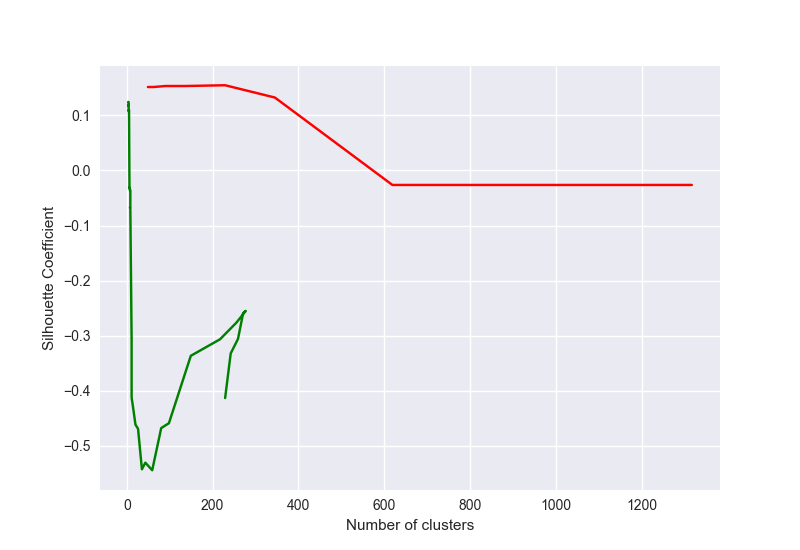

In [178]:
# plot the results
plt.figure()
plt.plot(df_eps_plot['clusters'], df_eps_plot['score'], color='g')
plt.plot(df_sample_plot['clusters'], df_sample_plot['score'], color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

#### f. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

In [261]:
from tqdm import tqdm_notebook as tqdm

In [262]:
# min_samples = range(1,11)
# epsilons = np.arange(0.05, 0.51, 0.01)

# fast for debug
min_samples = range(1,11, 2)
epsilons = np.arange(0.2, 0.51, 0.1)

silcoeff = np.zeros([len(min_samples), len(epsilons)])

for i, min_sample in enumerate(tqdm(min_samples, desc='min_samples')):
    for j, epsilon in enumerate(tqdm(epsilons, desc='epsilons')):
        
        
        dbscan = DBSCAN(eps=epsilon, min_samples=min_sample)
        labels = dbscan.fit_predict(XX[['lat','lon', 'alt']])
        silcoeff[i,j] = metrics.silhouette_score(XX[['lon','lat','alt']], labels)


In [256]:
# silcoeff[0,0] = np.nan

In [265]:
list(silcoeff)

[array([-0.57886386, -0.28390485, -0.16595282, -0.02641958]),
 array([-0.46056487, -0.14476693, -0.02000245, -0.02641958]),
 array([-0.42605159, -0.14603055,  0.13937789,  0.15451542]),
 array([-0.35454116, -0.02232658,  0.13589035,  0.15312689]),
 array([-0.36447705,  0.01737273,  0.13316253,  0.15131648])]

In [ ]:
len(min_samples)

In [283]:
df_eps_short_scores = df_eps['score'][:34]
# df_eps_short_scores.shape

df_eps['min_score'] = df_eps['score'][:34]
df_eps.head()

df_silcoeffs = df_eps.groupby('epsilon')['min_score','score'].apply(list).to_dict()
df_silcoeffs


In [8]:
import plotly.figure_factory as ff

# df_eps

df_eps_ff = ff.create_table(df_eps)
df_eps_ff = py.iplot(df_eps_ff, filename='table1')
df_eps_ff


NameError: name 'df_eps' is not defined

In [337]:
# for s in silcoeffs:
    
#     for eps_silc in eps_silcs:
#         silcoeff.append([df_eps['score']])
#         print(silcoeff)
#     for sample_silc in sample_silcs:
#         silcoeff.append([df_sample['score']])
#     print(silcoeff)

# establish variables, shorten computation time
min_samples = range(1,11, 1)
epsilons = np.arange(0.2, 0.51, 0.1)

# create empty dictionary
silcovfefe = np.zeros([len(min_samples), len(epsilons)])
silcovfefe.shape

# for loop, iterate through i,j
for i,min_sample in enumerate(min_samples):
    for j, epsilon in enumerate(epsilons):
    
        dbscan = DBSCAN(eps=epsilon, min_samples=min_sample)
        labels = dbscan.fit_predict(XX[['lat','lon', 'alt']])
#         append silhouette coefficient of i,j to empty dictionary
        silcovfefe[i,j] = metrics.silhouette_score(XX[['lon','lat','alt']], labels)

print(silcovfefe)


[[-0.57886386 -0.28390485 -0.16595282 -0.02641958]
 [-0.50891917 -0.16142834 -0.0745333  -0.02641958]
 [-0.46056487 -0.14476693 -0.02000245 -0.02641958]
 [-0.42684482 -0.14596664  0.09501202  0.13223161]
 [-0.42605159 -0.14603055  0.13937789  0.15451542]
 [-0.38925167  0.01322098  0.13391828  0.15312689]
 [-0.35454116 -0.02232658  0.13589035  0.15312689]
 [-0.34056536  0.00671813  0.13589035  0.15312689]
 [-0.36447705  0.01737273  0.13316253  0.15131648]
 [-0.3163645  -0.02514957  0.13049763  0.15131648]]


In [338]:
len(min_samples), len(epsilons)

(10, 4)

### 2D Array of Silhouettes: min_samples + epsilons

In [340]:
silcovfefe_t = np.array(silcovfefe)
silcovfefe_t = silcovfefe_t.transpose()
silcovfefe_t

array([[-0.57886386, -0.50891917, -0.46056487, -0.42684482, -0.42605159,
        -0.38925167, -0.35454116, -0.34056536, -0.36447705, -0.3163645 ],
       [-0.28390485, -0.16142834, -0.14476693, -0.14596664, -0.14603055,
         0.01322098, -0.02232658,  0.00671813,  0.01737273, -0.02514957],
       [-0.16595282, -0.0745333 , -0.02000245,  0.09501202,  0.13937789,
         0.13391828,  0.13589035,  0.13589035,  0.13316253,  0.13049763],
       [-0.02641958, -0.02641958, -0.02641958,  0.13223161,  0.15451542,
         0.15312689,  0.15312689,  0.15312689,  0.15131648,  0.15131648]])

In [4]:
# heatmap for silcovfefe
import plotly.graph_objs as go

In [359]:
silcovfefe_heatmap = go.Heatmap(z=silcovfefe_t, y=epsilons, zmax=1, zmin=-1)
data=[silcovfefe_heatmap]
layout = go.Layout(
    title='Silhouette coefficients'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(data, filename='silcovfefe-heatmap')

### Still figuring out how to use plotly. Heatmap of the 2D array silhouette coefficients. As you can see, bright red would be phenomenal but is nowhere on the map. The silhouette coefficient appears to improve as both the minimum number of samples and epsilons increase. 

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data. If your data is labeled already, with a class that you are attempting to predict, be sure to not use it in fitting/training/predicting. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D and 3D plots. 

For bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot
- Plots of the clustered data

## Note
You may use any for both parts 1 and 2, I only recommend using the data I used in the Lesson for part 1. I've included several new datasets in the `data/` folder, such as `beers.csv`, `snow_tweets.csv`, `data/USCensus1990.data.txt.gz`. You do not need to unzip or ungzip any data files. Pandas can open these files on its own.

In [40]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
plotly.tools.set_credentials_file(username='lilcutepawz', api_key='s1zZafc0wQNHq6KAnpo3')


%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
from sklearn.cluster import DBSCAN
from sklearn import metrics

### Data: Beer.csv 
### abv: alcohol by volume - ibu: hops measurement units

In [61]:
# Import data
X = pd.read_csv('../data/beers.csv', header=0, index_col=0)

X.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [63]:
X['ibu'].isnull().value_counts()

False    1405
True     1005
Name: ibu, dtype: int64

In [68]:
X.shape

(2410, 7)

In [72]:
# X = X.fillna(0)
# X.head()

# dropna values
X = X.dropna(axis=0, how='any')
            
X.shape

(1403, 7)

In [73]:
X.head()

,abv,ibu,id,name,style,brewery_id,ounces
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
21,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4
22,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0
24,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0
25,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0


### Find relevant clusters/groups within your data.

In [75]:
X = pd.get_dummies(X)
X.head()

,abv,ibu,id,brewery_id,ounces,name_#002 American I.P.A.,name_#004 Session I.P.A.,name_#9,name_077XX,name_113 IPA,...,style_Saison / Farmhouse Ale,style_Schwarzbier,style_Scotch Ale / Wee Heavy,style_Scottish Ale,style_Smoked Beer,style_Tripel,style_Vienna Lager,style_Wheat Ale,style_Winter Warmer,style_Witbier
14,0.061,60.0,1979,177,12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0.099,92.0,1036,368,8.4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0.079,45.0,1024,368,12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24,0.044,42.0,876,368,12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0.049,17.0,802,368,12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# K-means with N clusters
N = 7
from sklearn.cluster import KMeans
km = KMeans(n_clusters=N, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [77]:
set(km.labels_)

{0, 1, 2, 3, 4, 5, 6}

In [78]:
X['cluster'] = km.predict(X)

X.cluster.value_counts()

4    243
2    238
6    221
3    203
1    203
0    195
5    100
Name: cluster, dtype: int64

<IPython.core.display.Javascript object>


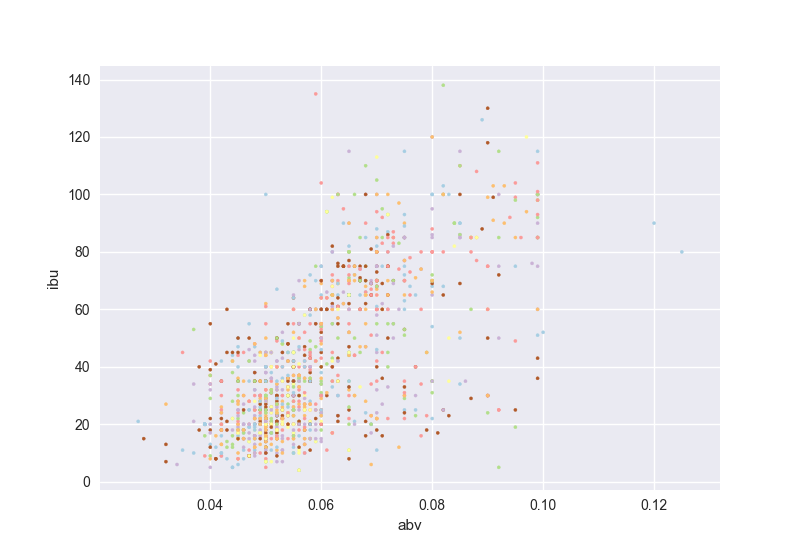

In [82]:
fig = plt.figure()
plt.scatter(X.abv, X.ibu, c=X.cluster, s=5, cmap='Paired')

plt.xlabel('abv')
plt.ylabel('ibu')
plt.show()

In [83]:
XX = X.copy()
XX['ibu'] = (X.ibu - X.ibu.mean())/X.ibu.std()
XX['abv'] = (X.abv - X.abv.mean())/X.abv.std()

In [84]:
# Rerun model with normalized data
km = KMeans(n_clusters=N, random_state=1)
XX['cluster'] = km.fit_predict(XX[['ibu', 'abv']])

<IPython.core.display.Javascript object>


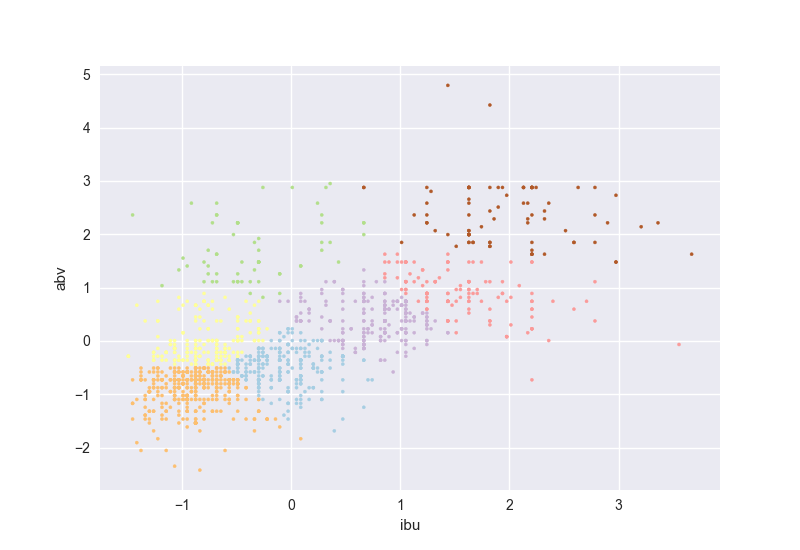

In [86]:
fig = plt.figure()
plt.scatter(XX.ibu, XX.abv, c=XX.cluster, s=5, cmap='Paired')

plt.xlabel('ibu')
plt.ylabel('abv')
plt.show()

In [105]:
XX = X.copy()
XX['ibu'] = (X.ibu - X.ibu.mean())/X.ibu.std()
XX['abv'] = (X.abv - X.abv.mean())/X.abv.std()
XX['brewery_id'] = (X.brewery_id - X.brewery_id.mean())/X.brewery_id.std()
# XX['ounces'] = (X.ounces - X.ounces.mean())/X.ounces.std()

In [106]:
XX.cluster.value_counts()

4    243
2    238
6    221
3    203
1    203
0    195
5    100
Name: cluster, dtype: int64

<IPython.core.display.Javascript object>


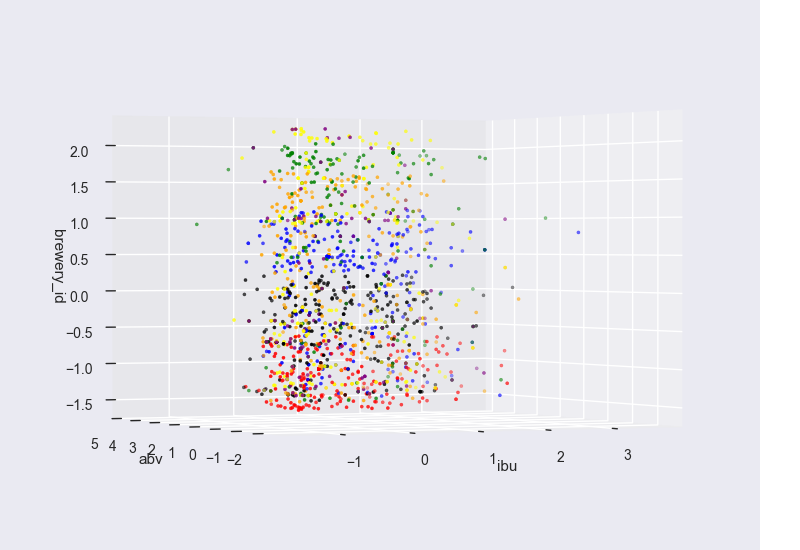

/Users/katie/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



In [109]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'black'])

fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(XX['ibu'], XX['abv'], XX['brewery_id'], c=colors[XX.cluster], s=5)

ax.set_xlabel('ibu')
ax.set_ylabel('abv')
ax.set_zlabel('brewery_id')

plt.show()
# ax.scatter(XX['ibu'], XX['abv'], XX['ounces'], c=colors[XX.cluster], s=5)

# ax.set_xlabel('ibu')
# ax.set_ylabel('abv')
# ax.set_zlabel('ounces')
# plt.show()

In [97]:
# calculate SC for K=7
from sklearn import metrics
metrics.silhouette_score(XX[['ibu', 'abv', 'brewery_id']], XX.cluster)

-0.062820373307451327

In [99]:
# calculate SC for K=2 through K=19
k_range = range(2, 40)
scores = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(XX[['ibu', 'abv', 'brewery_id']])
    scores.append(metrics.silhouette_score(XX[['ibu', 'abv', 'brewery_id']], labels))

In [110]:
scores[:5]

[0.3857409610342693,
 0.36606781700505159,
 0.35337054181303373,
 0.3558033430441358,
 0.36844448692563658]

<IPython.core.display.Javascript object>


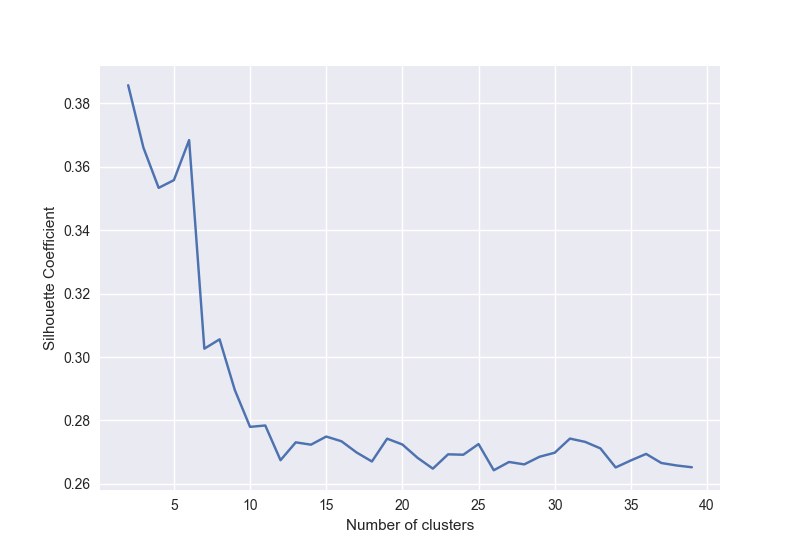

In [111]:
# plot the results
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()

### The clusters are quite distinct when plotting normalized data of alcohol by volume and international bitterness units. The model performs better generally with a lower number of clusters. It peaks at 6, and then again around 2-3 clusters. That said, a silhouette score around 0.4 isn't bad but also isn't great. I also removed all rows that contained nan values, but this also eliminated about 30-40% of the records. Perhaps imputing some of the data may provide improved results. 

### PCA  - still work in progress

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

# Import data
X = pd.read_csv('../data/beers.csv', header=0, index_col=0)

X.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [133]:
# dropna values
X = X.dropna(axis=0, how='any')
            
X.shape

(1403, 7)

In [134]:
X['style_num'] = X['style'].astype('category').cat.codes

X.head()

,abv,ibu,id,name,style,brewery_id,ounces,style_num
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0,15
21,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4,5
22,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0,88
24,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0,15
25,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0,55


In [135]:
X['style_num'].value_counts()[:5]

13    301
15    153
3      77
10     75
17     61
Name: style_num, dtype: int64

In [142]:
XX = X.drop('style', 1)
XX = XX.drop('style_num', 1)
XX = XX.drop('id', 1)
XX = XX.drop('name', 1)
XX.head()

,abv,ibu,brewery_id,ounces
14,0.061,60.0,177,12.0
21,0.099,92.0,368,8.4
22,0.079,45.0,368,12.0
24,0.044,42.0,368,12.0
25,0.049,17.0,368,12.0


In [143]:
print(type(XX))

<class 'pandas.core.frame.DataFrame'>


In [144]:
type(XX.values)

numpy.ndarray

In [145]:
XX = XX.values
y = X['style_num']
target_names = X['style']

In [1]:
target = X['style_num']
np.array(target)
type(target)

NameError: name 'X' is not defined